In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings

warnings.filterwarnings('ignore')

In [366]:
bike_train = pd.read_csv('./input/train.csv')
bike_test = pd.read_csv('./input/test.csv')

In [367]:
datetime = bike_test['datetime']

## 数据探索

In [368]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 查看不重复的列值

In [369]:
bike_train.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### 查看数据的缺失值

In [370]:
# bike_train.isnull().sum()

#### 使用 `missingno` 无效矩阵的数据密集显示

可以看出在我们的数据中没有缺失值

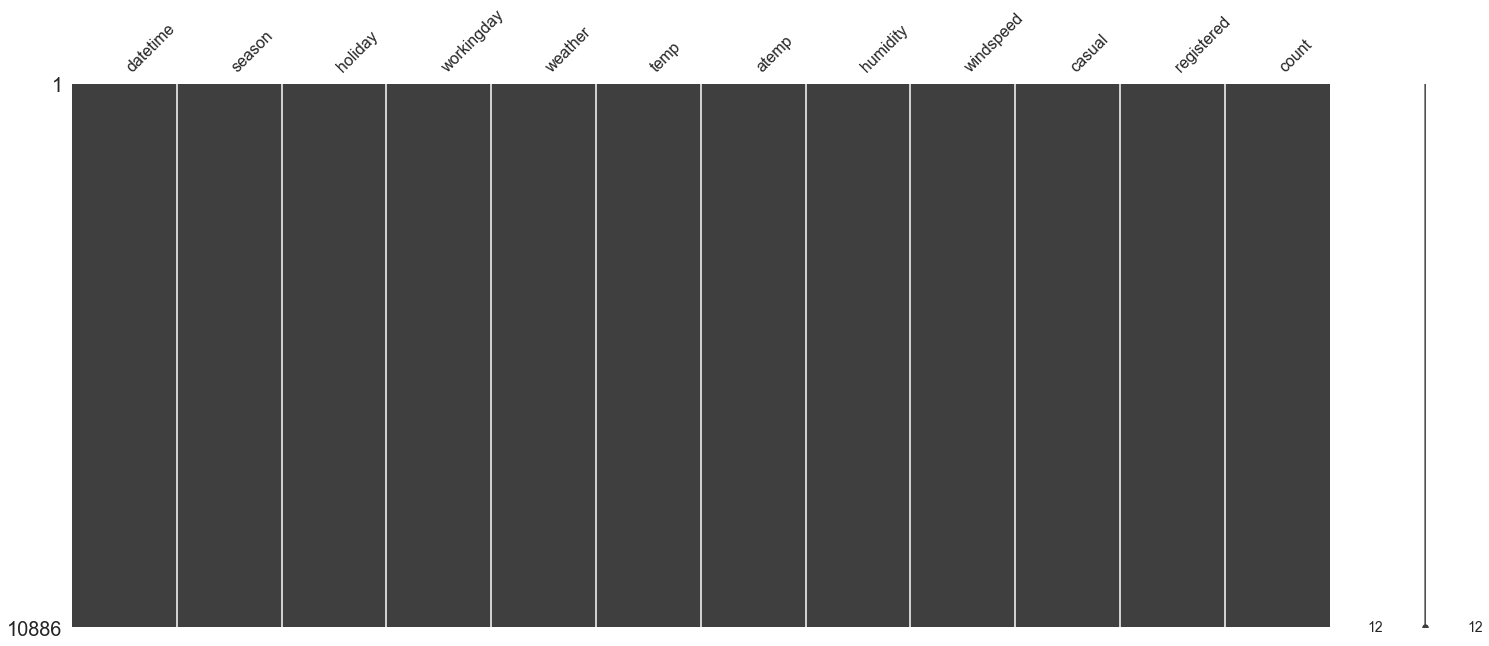

In [371]:
msno.matrix(bike_train)

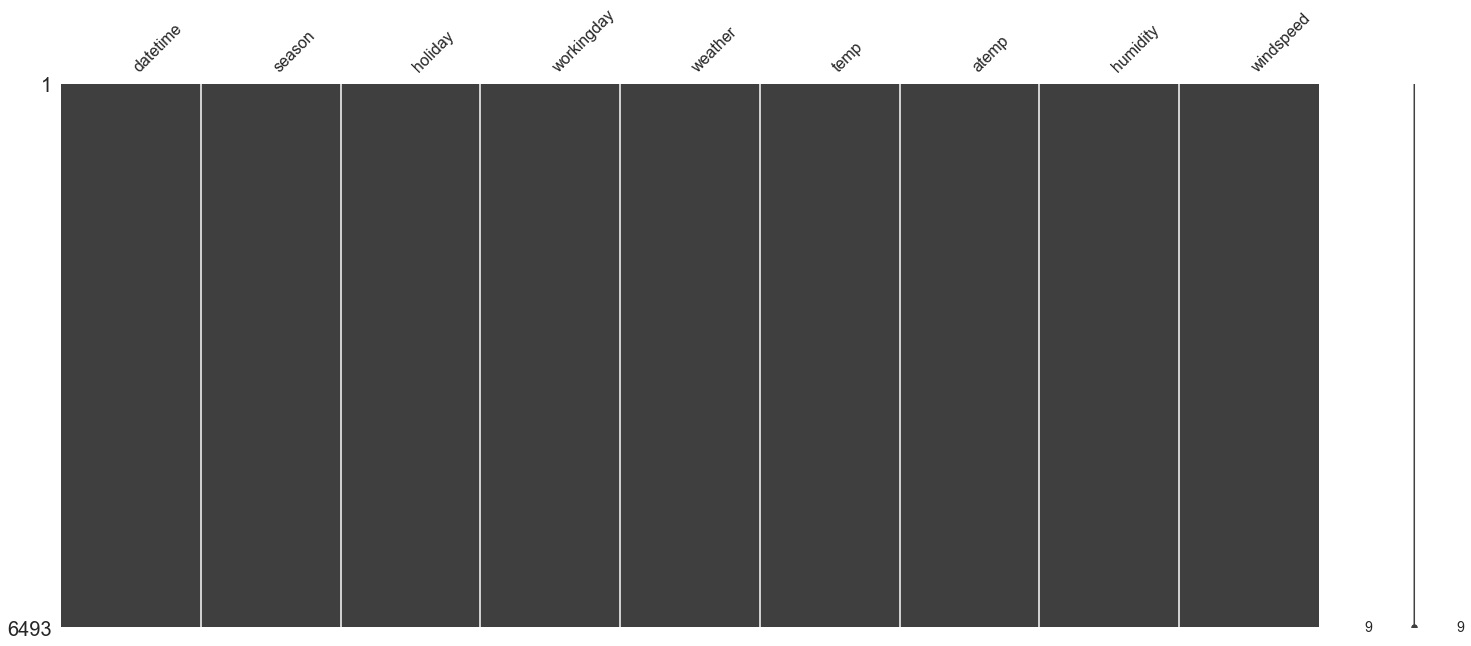

In [372]:
msno.matrix(bike_test)

#### 使用 `pandas_profiling` 来对数据进行分析

In [373]:
# import pandas_profiling
# profile = bike_train.profile_report(title = 'Pandas Profile Report')
# profile.to_file(output_file = 'Bike Sharing profile.html')

#### 对 `连续型数据` 进行 `箱型图` 可视化

In [374]:
sns.set(style='whitegrid',color_codes=True)
# from matplotlib import style
# style.use('fivethirtyeight')

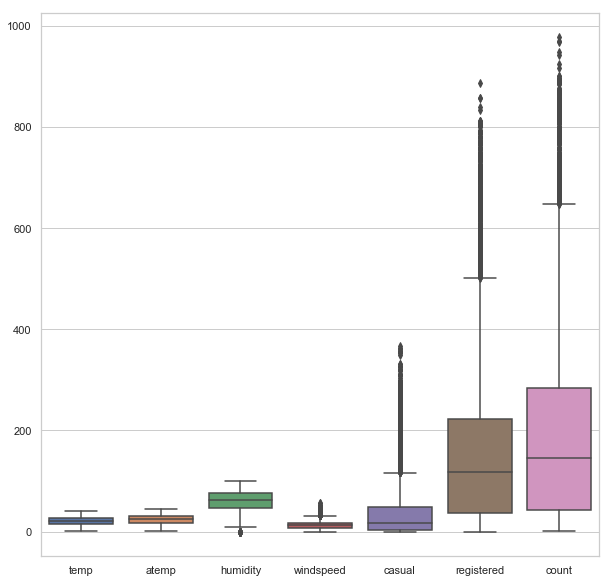

In [375]:
sns.boxplot(data=bike_train[['datetime', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig = plt.gcf()            # 获取 fig 对象
fig.set_size_inches(10,10) # 设置图像的长度和宽度

## 特征工程

#### 将分类变量 `season` 转化为虚拟变量 - `训练数据`

In [376]:
season = pd.get_dummies(bike_train['season'],prefix='season')
bike_train = pd.concat([bike_train,season],axis=1)
bike_train.drop(columns='season',inplace=True)
bike_train.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


#### 将分类变量 `season` 转化为虚拟变量 - `验证数据`

In [377]:
season = pd.get_dummies(bike_test['season'],prefix='season')
bike_test = pd.concat([bike_test,season],axis=1)
bike_test.drop(columns='season',inplace=True)
bike_test.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


#### 将分类变量 `workingday` 转化为虚拟变量 - `训练数据`

In [378]:
# workingday = pd.get_dummies(bike_train['workingday'],prefix='workingday')
# bike_train = pd.concat([bike_train,workingday],axis=1)
# bike_train.drop(columns='workingday',inplace=True)
# bike_train.head()

#### 将分类变量 `workingday` 转化为虚拟变量 - `验证数据`

In [379]:
# workingday = pd.get_dummies(bike_test['workingday'],prefix='workingday')
# bike_test = pd.concat([bike_test,workingday],axis=1)
# bike_test.drop(columns='workingday',inplace=True)
# bike_test.head()

#### 将分类变量 `holiday` 转化为虚拟变量 - `训练数据`

In [380]:
# holiday = pd.get_dummies(bike_train['holiday'],prefix='holiday')
# bike_train = pd.concat([bike_train,holiday],axis=1)
# bike_train.drop(columns='holiday',inplace=True)
# bike_train.head()

#### 将分类变量 `holiday` 转化为虚拟变量 - `验证数据`

In [381]:
# holiday = pd.get_dummies(bike_test['holiday'],prefix='holiday')
# bike_test = pd.concat([bike_test,holiday],axis=1)
# bike_test.drop(columns='holiday',inplace=True)
# bike_test.head()

#### 将分类变量 `weather` 转化为虚拟变量 - `训练数据`

In [382]:
weather = pd.get_dummies(bike_train['weather'],prefix='weather')
bike_train = pd.concat([bike_train,weather],axis=1)
bike_train.drop(columns='weather',inplace=True)
bike_train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


#### 将分类变量 `weather` 转化为虚拟变量 - `验证数据`

In [383]:
weather = pd.get_dummies(bike_test['weather'],prefix='weather')
bike_test = pd.concat([bike_test,weather],axis=1)
bike_test.drop(columns='weather',inplace=True)
bike_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


#### 将 `训练集` 时间 `datetime` 进行转换
 `pd.DatetimeIndex`  (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)

In [384]:
pd.DatetimeIndex(bike_train['datetime'])

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [385]:
bike_train['hour']  = [ t.hour for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['day']  = [ t.day for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['month']  = [ t.month for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['year']  = [ t.year for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['year'] = bike_train['year'].map({2011:0,2012:1})
bike_train.drop(columns='datetime',inplace=True)
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,1,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2,1,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,3,1,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,4,1,1,0


#### 将 `测试集` 时间 `datetime` 进行转换

In [386]:
bike_test['hour']  = [ t.hour for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['day']  = [ t.day for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['month']  = [ t.month for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['year']  = [ t.year for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['year'] = bike_test['year'].map({2011:0,2012:1})
bike_test.drop(columns='datetime',inplace=True)
bike_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,20,1,0
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,20,1,0
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,20,1,0
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,20,1,0
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,20,1,0


#### `casual` 和 `registered` 和 `count` 高度相关，并且测试集中不存在相应标签，这里进行删除 

In [387]:
bike_train.drop(columns=['casual','registered'],inplace=True)

#### `temp` 和 `atemp` 高度相关，这里只保留一项

In [388]:
bike_train.drop(columns=['temp'],inplace=True)
bike_test.drop(columns=['temp'],inplace=True)

In [389]:
bike_train.head()

,holiday,workingday,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,1,1,0
1,0,0,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,1,1,0
2,0,0,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,1,1,0
3,0,0,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,1,1,0
4,0,0,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,1,1,0


In [390]:
bike_train_y = bike_train[['count']]
bike_train_x = bike_train.drop(columns='count')

In [391]:
bike_train_x.head()

,holiday,workingday,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,14.395,81,0.0,1,0,0,0,1,0,0,0,0,1,1,0
1,0,0,13.635,80,0.0,1,0,0,0,1,0,0,0,1,1,1,0
2,0,0,13.635,80,0.0,1,0,0,0,1,0,0,0,2,1,1,0
3,0,0,14.395,75,0.0,1,0,0,0,1,0,0,0,3,1,1,0
4,0,0,14.395,75,0.0,1,0,0,0,1,0,0,0,4,1,1,0


In [392]:
bike_test.head()

,holiday,workingday,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,1,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,20,1,0
1,0,1,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,20,1,0
2,0,1,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,20,1,0
3,0,1,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,20,1,0
4,0,1,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,20,1,0


In [393]:
bike_test.columns.unique() ==  bike_train_x.columns.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

#### 重新进行数据分析 `pandas_profiling`

In [394]:
# profile = bike_train.profile_report(title='pandas profile report2')
# profile.to_file(output_file='bike sharing profiling2.html')

## 建立模型

In [395]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

In [396]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [397]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [398]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error

In [399]:
sfolder = StratifiedKFold(n_splits=10,random_state=1)

In [400]:
x_train,x_test,y_train,y_test = train_test_split(bike_train_x,bike_train_y,test_size=0.1,random_state=10)

In [401]:
# for train,test in sfolder.split(bike_train_x,bike_train_y):
#     print(train.shape,test.shape)

In [402]:
# bike_train_x.loc[train].head()

In [403]:
# bike_train_y.loc[train].head()

In [404]:
MLA = [
    
    # Ensemble Methods
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
#     GradientBoostingRegressor(),
    
    
    # line_model
#     Lasso(),
#     Ridge(),
#     LinearRegression(),
#     LogisticRegression(), 
    
    # svm
    SVR(),
#     LinearSVR(),
    
    # Tree
    DecisionTreeRegressor(),
    

    
    # XGB
#     XGBRegressor(),
    
]

### 对于 `回归` 使用 `RMSLE` 进行 `模型评估`

由于 `MSLE` 不能对 `负数` 进行处理 ( `ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.`)

在进行 `MSLE = mean_squared_log_error(y_pred,bike_train_y)` 就会出错，大部分线性模型好像都会出现这样的情况

类似于 `Lasso` 回归，对数值 `敏感` ，可采用 `标准化` 数据，但是使用 `线性回归` 的预测效果很 `差`。

In [39]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [40]:
# ss = StandardScaler()
# mms = MinMaxScaler()

In [41]:
# bike_train_x['new_atemp'] = ss.fit_transform(bike_train_x[['atemp']])
# bike_train_x['new_humidity'] = ss.fit_transform(bike_train_x[['humidity']])
# bike_train_x['new_windspeed'] = ss.fit_transform(bike_train_x[['windspeed']])

# mms.fit_transform(bike_train_x[['atemp']])
# bike_train_x['atemp'] = mms.fit_transform(bike_train_x[['atemp']])

In [82]:
# bike_train_x.drop(columns=['atemp','humidity','windspeed'],inplace=True)
# bike_train_x.head()

#### `测试集` 做相同的处理

In [43]:
# bike_test['atemp'] = ss.fit_transform(bike_test[['atemp']])
# bike_test['humidity'] = ss.fit_transform(bike_test[['humidity']])
# bike_test['windspeed'] = ss.fit_transform(bike_test[['windspeed']])

# mms.fit_transform(bike_test[['atemp']])
# bike_test['atemp'] = mms.fit_transform(bike_test[['atemp']])

### 绘制 `线性回归` 的 `学习曲线`

#### 使用 `多项式回归` 仍然会造成 `y_pred` 中存在 `负数` 的现象，无法进行 `mean_squared_log_error`

#### 结论：没法用 `线性回归` 损失太大, `多项式回归` 损失也很大

#### 绘制 `学习曲线` 的函数

In [89]:
# from sklearn.model_selection import train_test_split

In [90]:
# def plot_learning_curves(model,x,y):
#     x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)
#     train_errors,val_errors = [],[]
#     for m in range(1,len(x_train)):
#         model.fit(x_train[:m],y_train[:m])
#         y_train_predict = model.predict(x_train[:m])
#         y_val_predict = model.predict(x_val)
#         train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
#         val_errors.append(mean_squared_error(y_val_predict,y_val))
#     plt.plot(np.sqrt(train_errors),'r-',linewidth=2,label = 'train')
#     plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label = 'val')    
#     plt.ylabel('RMSE')
#     plt.xlabel('Training set size')    
#     plt.legend(loc='upper right')

<div align=left><img width="400" height="300" src="static/1.jpg"/></div>

In [91]:
# model = Lasso()
# plot_learning_curves(model,bike_train_x,bike_train_y)

#### `191` 列数据 `预测值` 和 `真实值` 之间的差别

In [92]:
# display(bike_train_y.loc[191])
# model.predict([bike_train_x.loc[191]])

# -- output 
# count    1                     # 真实值
# Name: 191, dtype: int64
# array([-28.11482529])          # 预测值

#### 采用 `多项式回归` 绘制 `RMSE` 学习曲线 数量很多，绘制很慢

In [301]:
# from sklearn.preprocessing import PolynomialFeatures
# ploy_features = PolynomialFeatures(degree=2,include_bias=False)
# x_poly = ploy_features.fit_transform(bike_train_x)
# x_poly  = pd.DataFrame(x_poly)

In [302]:
# model = Lasso()
# plot_learning_curves(model,x_poly,bike_train_y)

In [303]:
# display(bike_train_y.loc[191])
# model.predict([x_poly.loc[191]])

### 构造 `RMSLE`

#### 普通的 RMSLE

In [405]:
MLA_List1 = ['MLA_Name','MLA_Parameters','MLA_RMSLE']
MLA_Compare1 = pd.DataFrame(columns=MLA_List)
MLA_predict1 = bike_train[['count']].copy(deep=True)

def RMSLE(models,bike_train_x,bike_train_y,x_test,y_test):
    
    for row_index,model in enumerate(models):
        
        model.fit(bike_train_x,bike_train_y)
        y_pred = model.predict(x_test)

        MSLE = mean_squared_log_error(y_pred,y_test)
        RMSLE = np.sqrt(MSLE)
        
        print('model name: {} RMSLE_mean: {}'.format(model.__class__.__name__,RMSLE))
        MLA_Name = model.__class__.__name__
        MLA_Compare1.loc[row_index,'MLA_Name'] = MLA_Name
        MLA_Compare1.loc[row_index,'MLA_Parameters'] = str(model.get_params())
        MLA_Compare1.loc[row_index,'MLA_RMSLE'] = RMSLE
        
        test_index = x_test.index
        MLA_predict1.loc[test_index,MLA_Name] = y_pred                                             # 以最后一次预测为准
        
    return MLA_Compare1,MLA_predict1

#### 使用 `MLA` 中的模型进行 `回归分析` 使用的 `rmsle`

In [406]:
MLA_Compare1,MLA_predict1 = RMSLE(MLA,x_train,y_train,x_test,y_test)

model name: RandomForestRegressor RMSLE_mean: 0.3598113382890031
model name: AdaBoostRegressor RMSLE_mean: 1.1134800641933813
model name: BaggingRegressor RMSLE_mean: 0.3686812853928336
model name: SVR RMSLE_mean: 1.4962320942908693
model name: DecisionTreeRegressor RMSLE_mean: 0.4329862840725025


#### 统计 `模型` 的 `名称`、`参数`、`RMSLE` 

In [407]:
MLA_Compare1 = MLA_Compare1.sort_values('MLA_RMSLE',ascending=True)
MLA_Compare1

,MLA_Name,MLA_Parameters,MLA_RMSLE
0,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.359811
2,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.368681
4,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.432986
1,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",1.11348
3,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",1.49623


In [408]:
MLA_predict1[MLA_predict1['RandomForestRegressor'].isnull() == False].head(5)

,count,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,SVR,DecisionTreeRegressor
22,28,54.8,128.996047,59.2,142.559238,63.0
32,20,39.6,137.000000,20.9,141.113041,36.0
43,22,39.1,144.215038,43.9,142.361778,30.0
53,154,130.5,185.359551,169.3,140.574536,195.0
79,57,49.4,158.099348,59.8,141.181654,44.0


#### 普通 `RMSLE` 的模型可视化

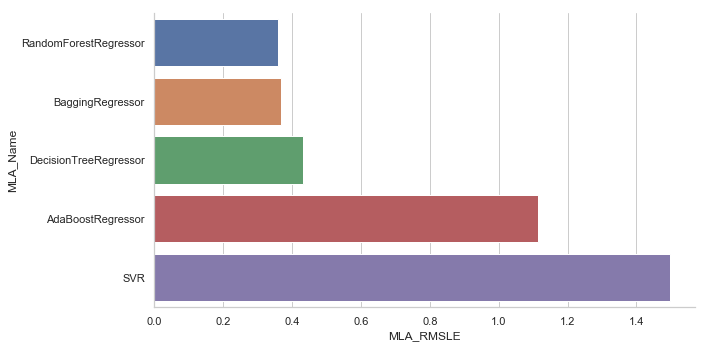

In [409]:
sns.factorplot(x='MLA_RMSLE',y='MLA_Name',data=MLA_Compare1,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

#### 交叉验证 RMSLE

In [410]:
MLA_List = ['MLA_Name','MLA_Parameters','MLA_RMSLE']
MLA_Compare = pd.DataFrame(columns=MLA_List)

MLA_predict = bike_train[['count']].copy(deep=True)

def RMSLE_cv(models):
    
    for row_index,model in enumerate(models):
        rmsle_lists = []
        
        for train_index,test_index in sfolder.split(bike_train_x,bike_train_y):    # 划分数据

            train_x = bike_train_x.loc[train_index]                                # 训练数据
            train_y = bike_train_y.loc[train_index]                                # 训练数据标签

            test_x = bike_train_x.loc[test_index]                                  # 验证数据
            test_y = bike_train_y.loc[test_index]                                  # 验证数据标签
            
#             return train_index,test_index
        
    #         print('train_x.shape,train_y.shape: ',train_x.shape,train_y.shape)       
    #         print('test_x.shape,test_y.shape: ',test_x.shape,test_y.shape)
    #         print('\n')

            model.fit(train_x,train_y)                                             # 模型训练
            y_pred = model.predict(test_x)                                         # 预测
            
#             print(y_pred.shape)
            
            MSLE = mean_squared_log_error(test_y,y_pred)                           # MSLE

            RMSLE = np.sqrt(MSLE)                                                  # RMSLE  

            rmsle_lists.append(RMSLE) 
        
        RMSLE = np.mean(rmsle_lists)
        print('model name: {} RMSLE_mean: {}'.format(model.__class__.__name__,RMSLE))
        MLA_Name = model.__class__.__name__
        MLA_Compare.loc[row_index,'MLA_Name'] = MLA_Name
        MLA_Compare.loc[row_index,'MLA_Parameters'] = str(model.get_params())
        MLA_Compare.loc[row_index,'MLA_RMSLE'] = RMSLE
        
        MLA_predict.loc[test_index,MLA_Name] = y_pred                                             # 以最后一次预测为准
        
    return MLA_Compare,MLA_predict

#### 使用 `MLA` 中的模型进行 `回归分析` 使用 `交叉验证` 的 `rmsle`

看起来交叉验证的效果好像更差......

In [ ]:
# MLA_Compare = RMSLE_cv(MLA)
MLA_Compare,MLA_predict= RMSLE_cv(MLA)

model name: RandomForestRegressor RMSLE_mean: 0.4019919406431767
model name: AdaBoostRegressor RMSLE_mean: 1.0590262360594438
model name: BaggingRegressor RMSLE_mean: 0.3978543855747578


#### 统计 `模型` 的 `名称`、`参数`、`RMSLE` 

In [329]:
MLA_Compare = MLA_Compare.sort_values('MLA_RMSLE',ascending=True)
MLA_Compare

,MLA_Name,MLA_Parameters,MLA_RMSLE
2,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.398536
0,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.398767
4,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.495282
1,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",1.05099
3,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",1.46119


In [202]:
MLA_predict[MLA_predict['RandomForestRegressor'].isnull() == False].head(5)

,count,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,SVR,DecisionTreeRegressor
6375,101,78.5,190.822034,85.7,146.311952,49.0
6402,72,75.2,66.747967,85.1,146.763343,91.0
6526,1,2.9,48.520629,2.9,143.794642,3.0
6569,83,45.9,173.569652,55.7,144.497565,26.0
6577,72,95.2,292.532583,107.6,139.766830,78.0


#### 模型 `RMSLE` 可视化

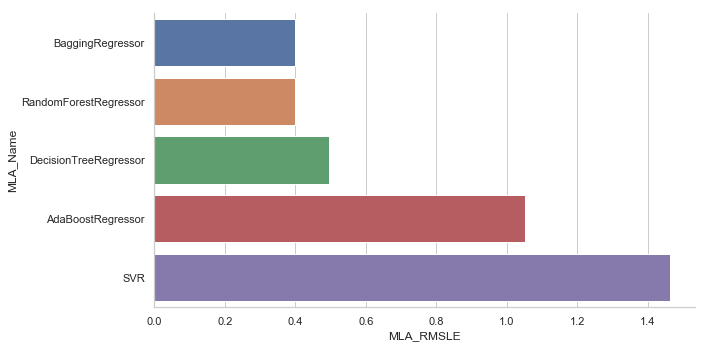

In [330]:
sns.factorplot(x='MLA_RMSLE',y='MLA_Name',data=MLA_Compare,kind='bar',size=5,aspect=2)

### `rfe`  特征筛选 `第一步：寻找一个优化模型`

In [246]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [301]:
# rdr = RandomForestRegressor(random_state=10) 

# rmse = np.sqrt(-cross_val_score(rdr,x_train,y_train,scoring='neg_mean_squared_error',cv=sfolder))
# rdr.fit(x_train,y_train)

# print('BEFORE rdr Parameters：',rdr.get_params())
# print('BEFORE rdr neg_mean_squared_error score：',rmse.mean())

# # 值得注意的是，如果参数写的不细致，那么在网格搜索后输出模型的参数时，不指定的参数不存在，这会影响到模型的质量
    
# '''  指定如下参数，模型的 rmse 为 58
# rdr_param = [{
#         'n_estimators':[10,20,50,100],
#         'max_depth':[None,3,6,9],
#         'random_state':[0],
#         'max_features':['auto','sqrt'],
#     }]
# '''

# ''' 指定如下参数，模型的 rmse 为 45 '''

# rdr_param = [{
#         'n_estimators':[300],
#         'max_depth':[None,3,6,9],
#         'random_state':[0],
#         'max_features':['auto'],
#         'bootstrap':[True],
#         'max_leaf_nodes': [None,3,6], 
#         'min_impurity_decrease': [0.0], 
#         'min_impurity_split': [None],
#         'min_samples_leaf': [1], 
#         'min_samples_split': [2], 
#         'min_weight_fraction_leaf': [0.0], 
#         'n_jobs': [None], 
#         'oob_score': [False], 
#         'verbose': [0], 
#         'warm_start': [False]
#     }]


# best_rd_model = GridSearchCV(estimator=rdr,param_grid=rdr_param,cv=sfolder,scoring='neg_mean_squared_error')
# best_rd_model.fit(x_train,y_train)
# best_rd_params = best_rd_model.best_params_

# print('\n')
# print('AFTER rdr Parameters: ',best_rd_model.best_params_)
# print('AFTER rdr RMSE: ',np.sqrt(-best_rd_model.cv_results_['mean_test_score'][best_rd_model.best_index_]))

BEFORE rdr Parameters： {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}
BEFORE rdr neg_mean_squared_error score： 45.53211082344724


AFTER rdr Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
AFTER rdr RMSE:  45.26016783750548


In [ ]:
'''
BEFORE rdr Parameters： {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}
BEFORE rdr neg_mean_squared_error score： 45.53211082344724


AFTER rdr Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
AFTER rdr RMSE:  45.26016783750548
'''

### `rfe`  特征筛选 `第二步：进行特征选择`

In [302]:
# print('BEFORE rdr data Shape: ',x_train.shape)
# print('BEFORE  rdr REF Columns: ',x_train.columns)
# print('\n')

# # 筛选特征
# rdr_rfe = RFECV(rdr,step=1,scoring='neg_mean_squared_error',cv=sfolder)
# rdr_rfe.fit(x_train,y_train)
# x_rfe = x_train.columns.values[rdr_rfe.get_support()]

# # 进行特征选择 后 重新训练
# rfe_score = np.sqrt(-cross_val_score(rdr,x_train[x_rfe],y_train,cv=sfolder,scoring='neg_mean_squared_error'))
# print('ALTER RFE rdr RMSE Score：',rfe_score.mean())
# print('AFTER  rdr REF Shape: ',x_train[x_rfe].shape)
# print('AFTER  rdr REF Columns: ',x_rfe)
# print('\n')

# # 进行 特征选择 对优化后的模型进行训练
# best_rd_model.fit(x_train[x_rfe],y_train)
# rdr_rfe.fit(x_train[x_rfe],y_train)
# rfe_score = np.sqrt(-cross_val_score(rdr,x_train[x_rfe],y_train,cv=sfolder,scoring='neg_mean_squared_error'))

# print('AFTER  best_rdr REF  Shape: ',x_train[x_rfe].shape)
# print('AFTER  best_rdr REF  Columns: ',x_rfe)
# print('ALTER RFE best_rdr RMSE Score：',rfe_score.mean())

BEFORE rdr data Shape:  (9797, 19)
BEFORE  rdr REF Columns:  Index(['atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'workingday_0', 'workingday_1', 'holiday_0', 'holiday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour', 'day',
       'month', 'year'],
      dtype='object')


ALTER RFE rdr RMSE Score： 45.4830047072299
AFTER  rdr REF Shape:  (9797, 13)
AFTER  rdr REF Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'
 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']


AFTER  best_rdr REF  Shape:  (9797, 13)
AFTER  best_rdr REF  Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'
 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']
ALTER RFE best_rdr RMSE Score： 45.4830047072299


In [305]:
''' 特征选择没起到效果
BEFORE rdr data Shape:  (9797, 19)
BEFORE  rdr REF Columns:  Index(['atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'workingday_0', 'workingday_1', 'holiday_0', 'holiday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour', 'day',
       'month', 'year'],
      dtype='object')


ALTER RFE rdr RMSE Score： 45.4830047072299
AFTER  rdr REF Shape:  (9797, 13)
AFTER  rdr REF Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'
 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']


AFTER  best_rdr REF  Shape:  (9797, 13)
AFTER  best_rdr REF  Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'
 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']
ALTER RFE best_rdr RMSE Score： 45.4830047072299
'''

### 寻找 `模型` 的 `最优参数`

In [215]:
import time

In [343]:
MLA2 = [
    
    # Ensemble Methods
    ('br',BaggingRegressor()),
    ('rfr',RandomForestRegressor()),
    ('Ada',AdaBoostRegressor()),
    
    # Tree
    ('dt',DecisionTreeRegressor()),
    
   # svm
#     ('svr',SVR()),
]

random_seed = [10]   # 随机种子 需要注意的是随机种子是一个列表

In [347]:
grid_params = [
    [{
        # BaggingRegressor
        'n_estimators' : [10,30,50,100],
        'random_state' : random_seed,
        'max_features' : [0.75,1],
        'max_samples' : [0.75,1],

    }],
    
    [{
        # RandomForestRegressor

        'n_estimators':[500],
        'max_depth':[None],
        'random_state':random_seed,
        'max_features':['auto'],
        'bootstrap':[True],
        'max_leaf_nodes': [None], 
        'min_impurity_decrease': [0.0], 
        'min_impurity_split': [None],
        'min_samples_leaf': [1], 
        'min_samples_split': [2], 
        'min_weight_fraction_leaf': [0.0], 
        'n_jobs': [None], 
        'oob_score': [False], 
        'verbose': [0], 
        'warm_start': [False]

    }],
    
    [{
        # AdaboostRegressor
        'n_estimators': [100,300],
        'learning_rate': [0.25],
        # algorithm ： {'SAMME'，'SAMME.R'}，可选（默认='SAMME.R'） 选择使用什么算法
        'random_state':random_seed
    }],
    
    [{
        # DecisionTreeRegressor
        'max_depth': [6,10],
        'random_state': random_seed,
        'min_samples_leaf':[2],
    }],
    

        
#     [{
#         # SVR
#         'C': [1,2], #default=1.0 惩罚参数
#         'gamma': [0.005,0.001], # default: auto 
#         'shrinking':[True],
#     }]
]

In [365]:
MLA_List = ['MLA_Name','MLA_Parameters','MLA_RMSLE']
MLA_Compare2 = pd.DataFrame(columns=MLA_List)
MLA_predict2 = bike_train[['count']].copy(deep=True)

start_time = time.perf_counter()

for row_index,(clf,param) in enumerate(zip(MLA2,grid_params)):
    one_model_start_time = time.perf_counter()
    
    best_model = GridSearchCV(estimator=clf[1],param_grid=param,scoring='neg_mean_squared_error',cv=sfolder)
    best_model.fit(x_train,y_train)
    
    end_time = time.perf_counter() - one_model_start_time
    
    best_params = str(best_model.best_params_)
    print('The beast parameter for {} is {} with runtime of {:.2f} secounds'.format(clf[1].__class__.__name__,best_params,end_time))

    y_pred = best_model.predict(x_test)                                         # 预测
    
    MSLE = mean_squared_log_error(y_test,y_pred)                           # MSLE
    RMSLE = np.sqrt(MSLE)                  
    print('The beast parameter for {} RMLSE is {}'.format(clf[1].__class__.__name__,RMSLE))
    print('\n')
    MLA_Name = clf[1].__class__.__name__
    MLA_Compare2.loc[row_index,'MLA_Name'] = MLA_Name
    MLA_Compare2.loc[row_index,'MLA_Parameters'] = best_params
    MLA_Compare2.loc[row_index,'MLA_RMSLE'] = RMSLE
    
    test_index = x_test.index
    MLA_predict2.loc[test_index,MLA_Name] = y_pred                                             # 以最后一次预测为准

The beast parameter for BaggingRegressor is {'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 10, 'random_state': 10} with runtime of 65.21 secounds
The beast parameter for BaggingRegressor RMLSE is 0.5314764549875067


The beast parameter for RandomForestRegressor is {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False} with runtime of 219.57 secounds
The beast parameter for RandomForestRegressor RMLSE is 0.34484228964037406


The beast parameter for AdaBoostRegressor is {'learning_rate': 0.25, 'n_estimators': 100, 'random_state': 10} with runtime of 47.49 secounds
The beast parameter for AdaBoostRegressor RMLSE is 0.9595574309423573


The beast parameter for DecisionTreeRegressor is {'max_depth':

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [350]:
MLA_Compare2 = MLA_Compare2.sort_values('MLA_RMSLE',ascending=True)
MLA_Compare2

,MLA_Name,MLA_Parameters,MLA_RMSLE
1,RandomForestRegressor,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.344842
3,DecisionTreeRegressor,"{'max_depth': 10, 'min_samples_leaf': 2, 'rand...",0.413238
0,BaggingRegressor,"{'max_features': 0.75, 'max_samples': 0.75, 'n...",0.531476
2,AdaBoostRegressor,"{'learning_rate': 0.25, 'n_estimators': 100, '...",0.959557


In [351]:
MLA_predict2[MLA_predict2['RandomForestRegressor'].isnull() == False].head(5)

,count,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor
22,28,56.2,44.662,125.729167,59.333333
32,20,30.8,33.400,157.398675,43.555556
43,22,52.5,42.296,135.824803,47.238095
53,154,148.9,151.980,155.206022,87.903226
79,57,56.4,54.342,153.731352,70.352941


## 开始预测

#### 不调参前 预测

In [359]:
rdr = RandomForestRegressor()
rdr.fit(bike_train_x,bike_train_y)

predictions= rdr.predict(bike_test)
submit_data=pd.DataFrame({'datetime':datetime,'count':predictions})
submit_data[submit_data['count']==0].count()

datetime    0
count       0
dtype: int64

In [360]:
submit_data.to_csv("no_grid_search.csv", index=False)

#### 调参后预测

In [361]:
rdr2 = RandomForestRegressor()
rdr2.set_params(**{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False})

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [364]:
bike_test.head()

,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,workingday_0,workingday_1,holiday_0,holiday_1,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,11.365,56,26.0027,1,0,0,0,0,1,1,0,1,0,0,0,0,20,1,0
1,13.635,56,0.0000,1,0,0,0,0,1,1,0,1,0,0,0,1,20,1,0
2,13.635,56,0.0000,1,0,0,0,0,1,1,0,1,0,0,0,2,20,1,0
3,12.880,56,11.0014,1,0,0,0,0,1,1,0,1,0,0,0,3,20,1,0
4,12.880,56,11.0014,1,0,0,0,0,1,1,0,1,0,0,0,4,20,1,0


In [362]:
rdr2.fit(bike_train_x,bike_train_y)

predictions= rdr2.predict(bike_test)
submit_data=pd.DataFrame({'datetime':datetime,'count':predictions})
submit_data[submit_data['count']==0].count()

datetime    0
count       0
dtype: int64

In [363]:
submit_data.to_csv("grid_search.csv", index=False)

### 对于 `分类` 情况，直接进行 `分类预测`

In [ ]:
# MLA_List = ['MLA_Name','MLA_Parameters','MLA Train Accuracy Mean','MLA Test Accuracy Mean','MLA Test Accuracy 3*STD','MLA Time']
# MLA_Compare = pd.DataFrame(columns=MLA_list)

# MLA_predict = bike_train[['count']].copy(deep=True)

# for row_index,alg in enumerate(MLA):
#     MLA_Name = alg.__class__.__name__
#     MLA_Compare.loc[row_index,'MLA_Name'] = MLA_Name
#     MLA_Compare.loc[row_index,'MLA_Parameters'] = str(alg.get_params())
#     cv_result = cross_validate(alg,bike_train_x,bike_train_y,cv=sfolder,return_train_score=True,scoring='')
    
#     MLA_Compare.loc[row_index,'MLA Train Accuracy Mean'] = cv_result['train_score'].mean()
#     MLA_Compare.loc[row_index,'MLA Test Accuracy Mean'] = cv_result['test_score'].mean()
#     MLA_Compare.loc[row_index,'MLA Test Accuracy 3*STD'] = cv_result['test_score'].std()*3
#     MLA_Compare.loc[row_index,'MLA Time'] = cv_result['fit_time'].mean()
    
#     alg.fit(bike_train_x,bike_train_y)
    
#     MLA_predict[MLA_Name] = alg.predict(bike_train_x) 
    
# MLA_Compare.sort_values('MLA Test Accuracy Mean',ascending=True)    
# MLA_Compare